In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq


In [2]:
nombres = ['t','Cx','Cy','Cxa','Cya','dCx','dCy']
r = pd.read_csv('../data/drag_lift_1dt.txt',header=None,
                delim_whitespace=True,index_col=0,names=nombres)
r.head()

,Cx,Cy,Cxa,Cya,dCx,dCy
t,,,,,,
0,1.850372e-13,5.782412e-15,0.0,0.0,0.0,0.0
1,-0.000000e+00,-0.000000e+00,0.0,0.0,0.0,0.0
2,1.850372e-13,1.445603e-14,0.0,0.0,0.0,0.0
3,-0.000000e+00,-1.734723e-14,0.0,0.0,0.0,0.0
4,1.850372e-13,7.228014e-15,0.0,0.0,0.0,0.0


In [3]:
len(r)

553865

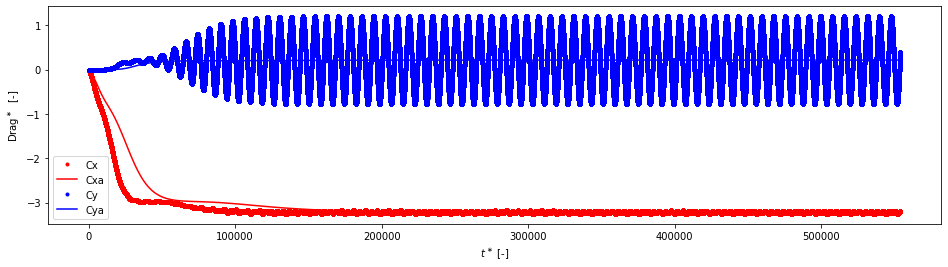

In [4]:
fig, ax  = plt.subplots(figsize=(16,4))
ax.plot(r.Cx,'r.',label='Cx')
ax.plot(r.Cxa,'r-',label='Cxa')
ax.plot(r.Cy,'b.',label='Cy')
ax.plot(r.Cya,'b-',label='Cya')

ax.set_xlabel('$t^\\ast$ [-]')
ax.set_ylabel('Drag$^\\ast$  [-]')
ax.legend()

Text(0, 0.5, 'Drag$^\\ast$  [-]')

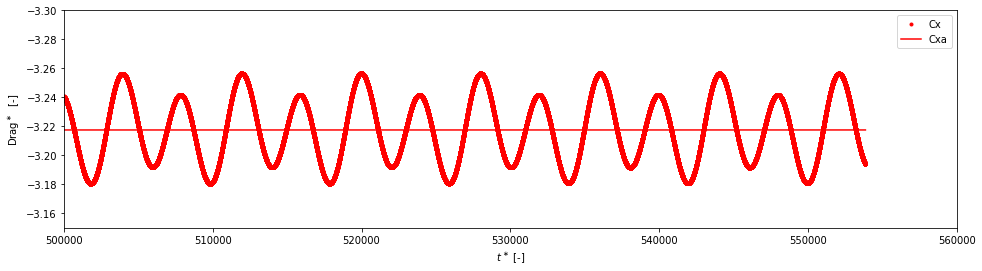

In [5]:
fig, ax  = plt.subplots(figsize=(16,4))
ax.plot(r.Cx,'r.',label='Cx')
ax.plot(r.Cxa,'r-',label='Cxa')
ax.set_xlim(500_000,560_000)
ax.set_ylim(-3.15,-3.3)
ax.legend()


ax.set_xlabel('$t^\\ast$ [-]')
ax.set_ylabel('Drag$^\\ast$  [-]')

(1e-05, 100)

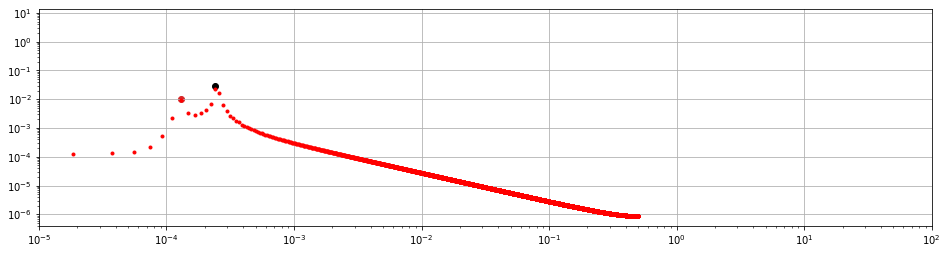

In [36]:
# T = 0.000024
T = 1
N = len(r[500_000:560_000].Cx)
yf = fft(np.array(r[500_000:560_000].Cx))
xf = fftfreq(N, T)[:N//2]
fig, ax  = plt.subplots(figsize=(16,4))

f1 = 1.3e-4
f2 = 0.00024
ax.loglog(xf, 2.0/N * np.abs(yf[0:N//2]),'r.')
ax.scatter(f1,1e-2,c='C3')
# ax.scatter(5.02*0.000024,0.01,c='C4' )
ax.scatter(f2,2.8e-2,c='k')
ax.grid()
ax.set_xlim(1e-5,100)

## Nyquist sampling (f) = d*2, where d=the smallest object, or highest frequency, you wish to record.

It is often recommended (f) = d*4

In [7]:
f2

0.00024

In [11]:
f = f1*4
t = 1/f
t

1923.0769230769233

In [23]:
f = 4e-4*4
t = 1/f
t

625.0

In [29]:
t = 500

In [30]:
R = r[::t]

Text(0, 0.5, 'Drag$^\\ast$  [-]')

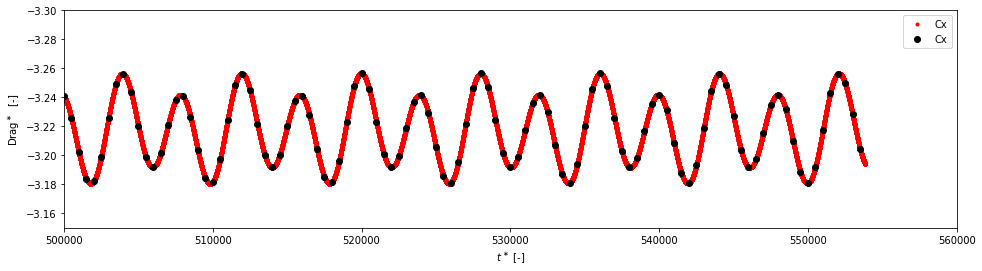

In [31]:
fig, ax  = plt.subplots(figsize=(16,4))
ax.plot(r.Cx,'r.',label='Cx')
ax.plot(R.Cx,'ko',label='Cx')
ax.set_xlim(500_000,560_000)
ax.set_ylim(-3.15,-3.3)
ax.legend()


ax.set_xlabel('$t^\\ast$ [-]')
ax.set_ylabel('Drag$^\\ast$  [-]')